## Unemployment Analysis with Python

Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. We have seen a sharp increase in the unemployment rate during Covid-19, so analyzing the unemployment rate can be a good data science project. In this article, I will take you through the task of Unemployment analysis with Python.

The unemployment rate is calculated based on a particular region, so to analyze unemployment I will be using an unemployment dataset of India. The dataset I’m using here contains data on India’s unemployment rate during Covid-19. So let’s start the task of Unemployment analysis by importing the necessary Python libraries and the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import plotly.express as px

%matplotlib inline

## Data Collecting

In [2]:
data = pd.read_csv(r".\\data\Unemployment_Analysis_data.csv")
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [3]:
print(data.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129

## Data Pre_Processing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1   Date                                      267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [6]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [8]:
print(data.describe())

        Estimated Unemployment Rate (%)   Estimated Employed  \
count                        267.000000         2.670000e+02   
mean                          12.236929         1.396211e+07   
std                           10.803283         1.336632e+07   
min                            0.500000         1.175420e+05   
25%                            4.845000         2.838930e+06   
50%                            9.650000         9.732417e+06   
75%                           16.755000         2.187869e+07   
max                           75.850000         5.943376e+07   

        Estimated Labour Participation Rate (%)   longitude    latitude  
count                                267.000000  267.000000  267.000000  
mean                                  41.681573   22.826048   80.532425  
std                                    7.845419    6.270731    5.831738  
min                                   16.770000   10.850500   71.192400  
25%                                   37.265000   18.

In [10]:
data.columns

Index(['Region', 'Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

## Let’s see if this dataset contains missing values or not

In [15]:
data.isnull()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
262,False,False,False,False,False,False,False,False,False
263,False,False,False,False,False,False,False,False,False
264,False,False,False,False,False,False,False,False,False
265,False,False,False,False,False,False,False,False,False


In [18]:
print(data.isnull().sum())

Region                                      0
Date                                        0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64


While analyzing the missing values, I found that the column names are not correct. So, for a better understanding of this data, I will rename all the columns

In [19]:
data.columns= ["States","Date","Frequency",
               "Estimated Unemployment Rate",
               "Estimated Employed",
               "Estimated Labour Participation Rate",
               "Region","longitude","latitude"]

Now let’s have a look at the correlation between the features of this dataset

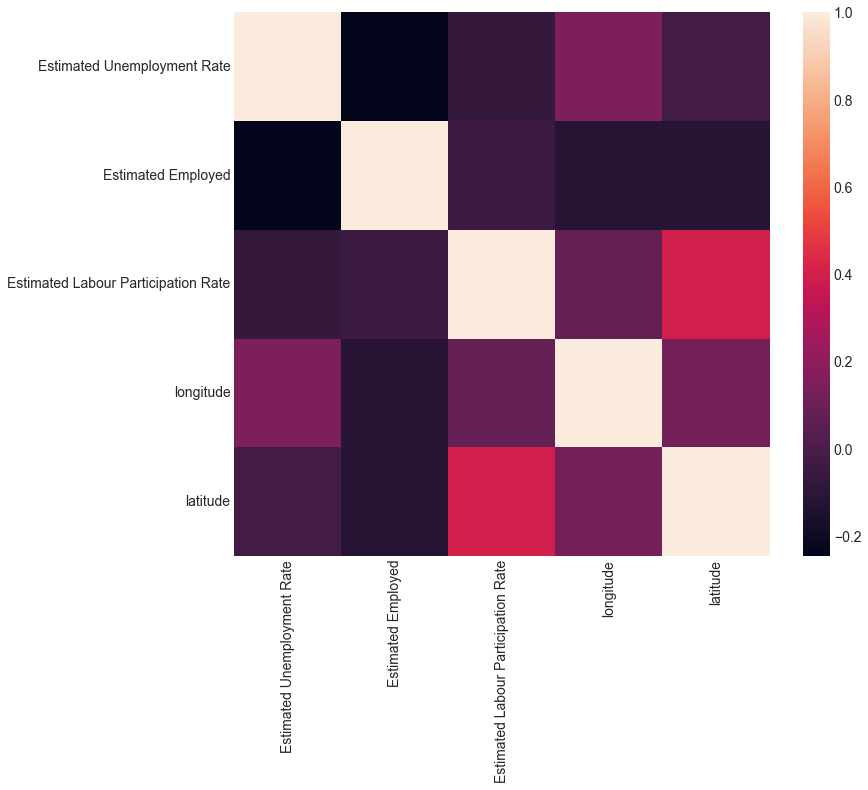

In [28]:
plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(12,10))
plt.rc("font", size=14)
sns.heatmap(data.corr())
plt.show()

## Unemployment Rate Analysis: Data Visualization

Now let’s visualize the data to analyze the unemployment rate. I will first take a look at the estimated number of employees according to different regions of India

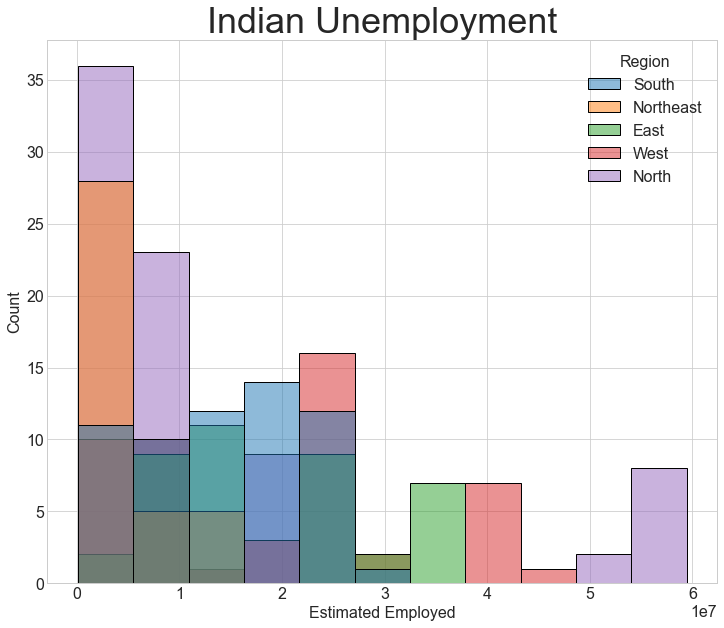

In [34]:
data.columns = ["States","Date","Frequency",
               "Estimated Unemployment Rate","Estimated Employed",
               "Estimated Labour Participation Rate","Region",
               "longitude","latitude"]
plt.figure(figsize=(12,10))
plt.rc("font",size=16)
plt.title("Indian Unemployment", fontsize=36)
sns.histplot(x="Estimated Employed", hue="Region", data=data)
plt.show()


Now let’s see the unemployment rate according to different regions of India

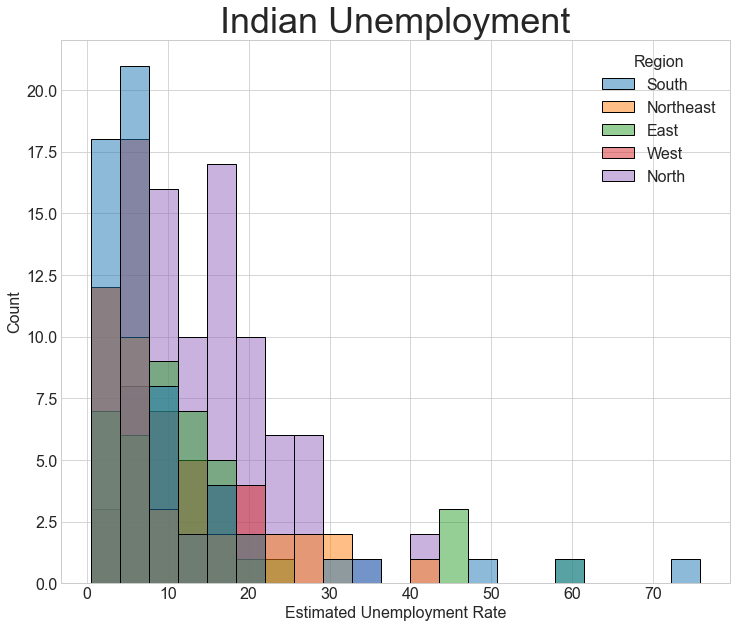

In [35]:
plt.figure(figsize=(12, 10))
plt.rc("font", size=16)
plt.title("Indian Unemployment", fontsize=36)
sns.histplot(x="Estimated Unemployment Rate", hue="Region", data=data)
plt.show()

Now let’s create a dashboard to analyze the unemployment rate of each Indian state by region. For this, I’ll use a sunburst plot

In [45]:
unemploment = data[["States", "Region", "Estimated Unemployment Rate"]]
figure = px.sunburst(unemploment, path=["Region", "States"],
                     values="Estimated Unemployment Rate",
                     width=700, height=700, color_continuous_scale="RdY1Gn",
                     title="Unemployment Rate in India")
figure.show()

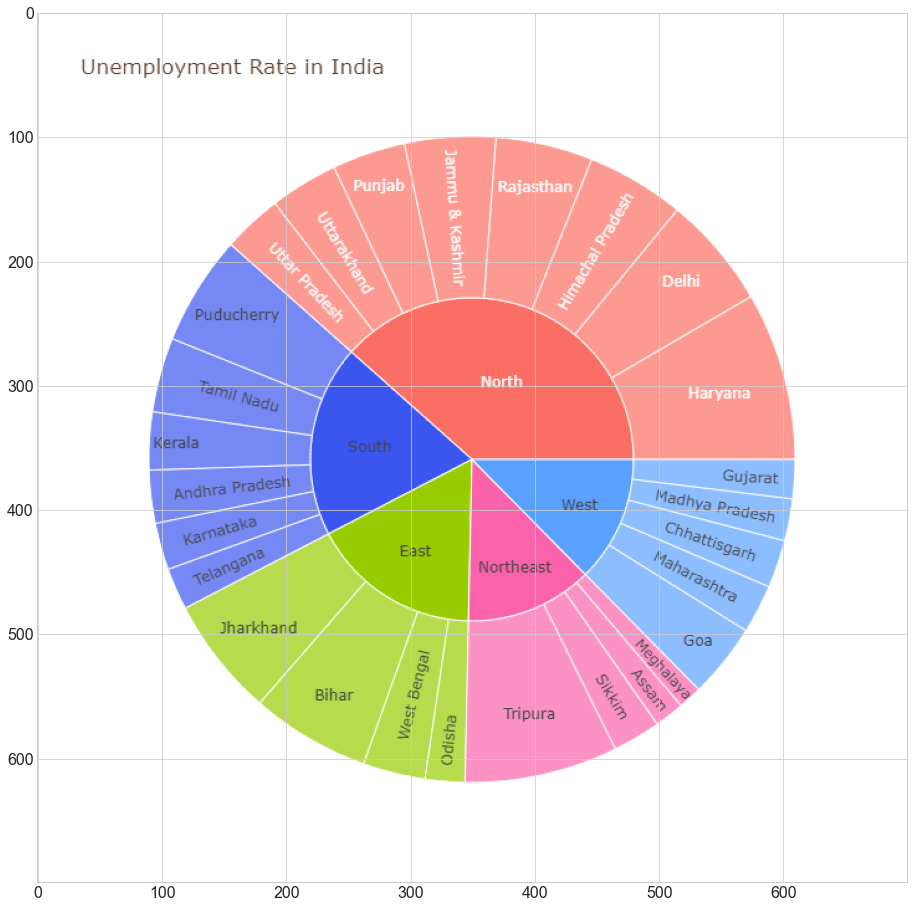

In [50]:
img = cv2.imread(".\\newplot.png")
plt.figure(figsize=(28,16))
plt.imshow(img)

## Summary

So this is how you can analyze the unemployment rate by using the Python programming language. Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. I hope you liked this article on unemployment rate analysis with Python. Feel free to ask your valuable questions in the comments section below.

## Sheikh Rasel Ahmed

Data Science || Machine Learning || Deep Learning || Artificial Intelligence Enthusiast

In [51]:
# LinkedIn - https://www.linkedin.com/in/shekhnirob1

# GitHub - https://github.com/Rasel1435

# Behance - https://www.behance.net/Shekhrasel2513
